In [1]:

import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt



### 📊 Dataset Overview & Use Case
We load La Liga season data (2014–2025).  
This gives team-level stats per season: matches, wins, goals, points, xG, attendance, etc.  

**Use Case**:  
- Provides the foundation for all further analytics.  
- Lets analysts, fans, and media understand what kind of data is available.  


In [2]:
full_data = pd.read_csv("La_liga_data_2014-2025.csv")

In [3]:
print(full_data["season"].unique())

[2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024]


In [4]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [5]:
print(full_data.shape)
full_data.tail(5)

(220, 20)


,rk,squad,mp,w,d,l,gf,ga,gd,pts,pts/mp,attendance,top_team_scorer,goalkeeper,notes,season,xg,xga,xgd,xgd/90
215,16,Girona,38,11,8,19,44,60,-16,41,1.08,11657.0,Cristhian Stuani - 11,Paulo Gazzaniga,NaN,2024,42.5,50.4,-8.0,-0.21
216,17,Sevilla,38,10,11,17,42,55,-13,41,1.08,35619.0,Dodi Lukebakio - 11,Ørjan Nyland,NaN,2024,42.7,47.4,-4.7,-0.12
217,18,Leganés,38,9,13,16,39,56,-17,40,1.05,11135.0,Dani Raba - 8,Marko Dmitrović,Relegated,2024,36.0,59.4,-23.4,-0.62
218,19,Las Palmas,38,8,8,22,40,61,-21,32,0.84,23010.0,Fábio Silva - 10,Jasper Cillessen,Relegated,2024,36.3,66.8,-30.5,-0.80
219,20,Valladolid,38,4,4,30,26,90,-64,16,0.42,19831.0,Mamadou Sylla - 5,Karl Jakob Hein,Relegated,2024,34.6,67.6,-33.0,-0.87


### ⚽ Consistency of Teams in La Liga
This shows how many times each club appeared across 11 seasons (2014–2025).  

**Use Case**:  
- Identifies stable top-flight clubs (Real Madrid, Barcelona, Atlético).  
- Highlights promoted/relegated teams (like Las Palmas, Valladolid).  
- Useful for tracking team stability & long-term presence.  


In [6]:
# number of appearances for the past 11 seasons 
# if below 11 then the team was relegated at some point
full_data['squad'].value_counts()

squad
Barcelona          11
Real Madrid        11
Atlético Madrid    11
Valencia           11
Sevilla            11
Villarreal         11
Athletic Club      11
Celta Vigo         11
Real Sociedad      11
Getafe             10
Betis              10
Espanyol            9
Alavés              8
Levante             7
Rayo Vallecano      7
Osasuna             7
Granada             7
Eibar               7
Mallorca            5
Valladolid          5
Leganés             5
Girona              5
Las Palmas          5
Elche               4
Málaga              4
Cádiz               4
La Coruña           4
Almería             3
Sporting Gijón      2
Huesca              2
Córdoba             1
Name: count, dtype: int64

In [7]:
# Top 3 ranking count per team
full_data['squad'].groupby(full_data['rk']).value_counts().head(10)

rk  squad          
1   Barcelona          6
    Real Madrid        4
    Atlético Madrid    1
2   Real Madrid        5
    Barcelona          4
    Atlético Madrid    2
3   Atlético Madrid    7
    Real Madrid        2
    Barcelona          1
    Girona             1
Name: count, dtype: int64

### 🏆 Top 3 Finishes Analysis
We analyze which teams frequently finished in the **top 3 positions**.  

**Use Case**:  
- Identifies “elite” teams with consistent high performance.  
- Valuable for sponsors & media focusing on top teams.  
- Fans can compare dominance over years.  


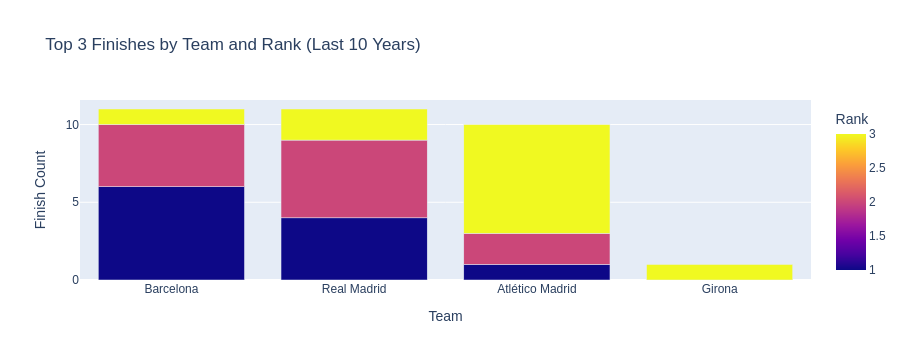

In [8]:
# Get the top 3 ranks only
ranking_counts = full_data['squad'].groupby(full_data['rk']).value_counts().reset_index(name='count')

# Keep only top 3 ranks (optional if you're sure it’s only top 3)
ranking_counts = ranking_counts[ranking_counts['rk'].isin([1,2,3])]

# Plot
fig = px.bar(ranking_counts, x='squad', y='count', color='rk',
             barmode='group',
             title='Top 3 Finishes by Team and Rank (Last 10 Years)',
             labels={'squad': 'Team', 'count': 'Finish Count', 'rk': 'Rank'})

fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [9]:

full_data.describe()

,rk,mp,w,d,l,gf,ga,gd,pts,pts/mp,attendance,season,xg,xga,xgd,xgd/90
count,220.000000,220.0,220.000000,220.000000,220.000000,220.000000,220.000000,220.00000,220.00000,220.000000,204.000000,220.000000,160.00000,160.000000,160.000000,160.000000
mean,10.500000,38.0,14.063636,9.872727,14.063636,49.900000,49.900000,0.00000,52.05000,1.370000,26453.098039,2019.000000,48.84250,48.843750,0.000000,-0.000312
std,5.779431,0.0,6.214987,2.914643,5.476854,17.750915,13.141277,26.75391,17.47411,0.459624,18088.531993,3.169489,11.62082,8.621326,17.129878,0.450948
min,1.000000,38.0,3.000000,2.000000,1.000000,22.000000,18.000000,-64.00000,16.00000,0.420000,91.000000,2014.000000,29.30000,32.500000,-33.000000,-0.870000
25%,5.750000,38.0,10.000000,8.000000,10.000000,38.000000,41.000000,-17.00000,41.00000,1.080000,13677.500000,2016.000000,40.57500,42.875000,-11.000000,-0.290000
50%,10.500000,38.0,13.000000,10.000000,15.000000,46.000000,50.000000,-6.00000,48.50000,1.275000,19957.000000,2019.000000,45.85000,48.300000,-3.150000,-0.080000
75%,15.250000,38.0,17.250000,12.000000,18.000000,57.000000,58.000000,13.00000,61.00000,1.610000,37320.500000,2022.000000,53.97500,54.425000,11.000000,0.292500
max,20.000000,38.0,30.000000,18.000000,30.000000,118.000000,94.000000,89.00000,95.00000,2.500000,83498.000000,2024.000000,91.50000,76.200000,49.500000,1.300000


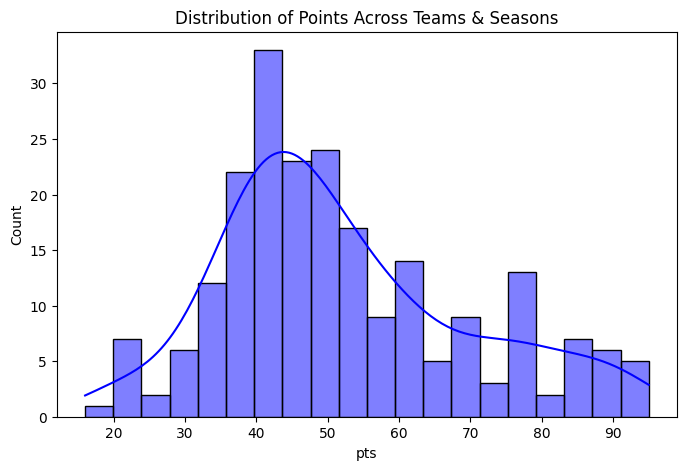

In [10]:
import seaborn as sns

# Histogram of Points
plt.figure(figsize=(8,5))
sns.histplot(full_data["pts"], bins=20, kde=True, color="blue")
plt.title("Distribution of Points Across Teams & Seasons")
plt.show()


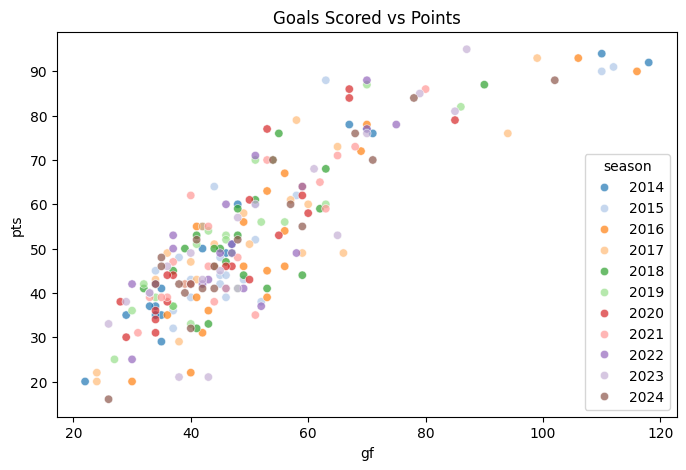

In [11]:
# Goals For vs Points
plt.figure(figsize=(8,5))
sns.scatterplot(data=full_data, x="gf", y="pts", hue="season", palette="tab20", alpha=0.7)
plt.title("Goals Scored vs Points")
plt.show()

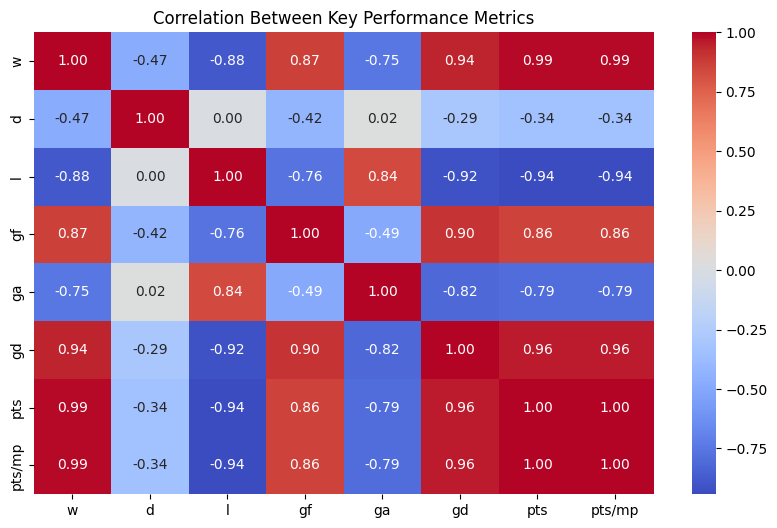

In [12]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(full_data[["w","d","l","gf","ga","gd","pts","pts/mp"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Key Performance Metrics")
plt.show()

### 👑 Champions Across Seasons
This table shows the La Liga champions for each season (2014–2024).  

**Use Case**:  
- Highlights the dominance of Barcelona & Real Madrid.  
- Provides a historical baseline for predictions.  
- Supports media storytelling about rivalries & title races.  


In [13]:
####### Winning teams of the past 10 years

# Filter the dataset for teams that finished 1st each season
winning_teams = full_data[full_data["rk"] == 1][["season", "squad", "pts", "pts/mp", "gd"]].sort_values("season")

# Display the results
print(winning_teams)

     season            squad  pts  pts/mp  gd
0      2014        Barcelona   94    2.47  89
20     2015        Barcelona   91    2.39  83
40     2016      Real Madrid   93    2.45  65
60     2017        Barcelona   93    2.45  70
80     2018        Barcelona   87    2.29  54
100    2019      Real Madrid   87    2.29  45
120    2020  Atlético Madrid   86    2.26  42
140    2021      Real Madrid   86    2.26  49
160    2022        Barcelona   88    2.32  50
180    2023      Real Madrid   95    2.50  61
200    2024        Barcelona   88    2.32  63


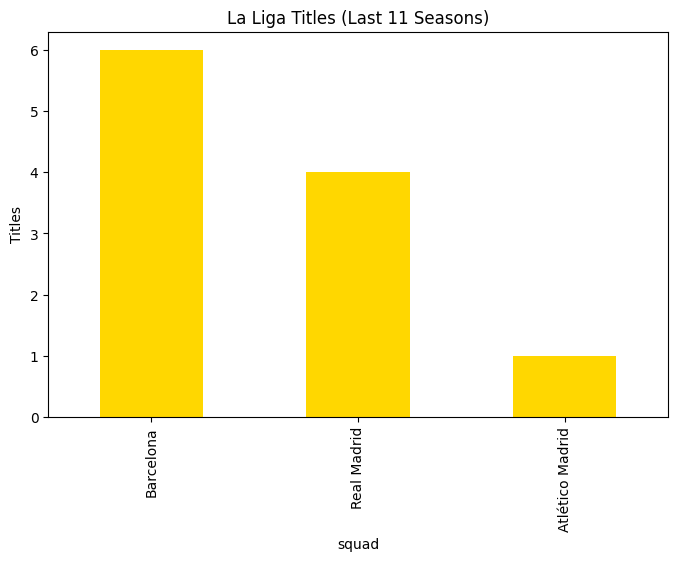

In [14]:
# Titles per team
titles = winning_teams["squad"].value_counts()
titles.plot(kind="bar", figsize=(8,5), color="gold")
plt.title("La Liga Titles (Last 11 Seasons)")
plt.ylabel("Titles")
plt.show()

### ⚖️ Competitive Balance in La Liga
We count how many titles each team has won and measure league balance using the **Gini coefficient** of points.  

**Use Case**:  
- High Gini → league dominated by few teams.  
- Low Gini → more balanced competition.  
- Important for league governance, fairness debates, and sponsorship decisions.  


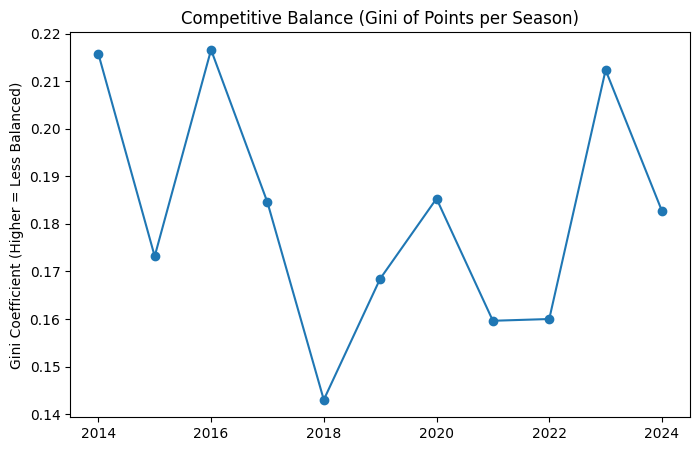

In [15]:
# Competitive balance (Gini coefficient of points each season)
from itertools import groupby
import numpy as np

def gini(array):
    array = np.sort(array)
    n = len(array)
    cumx = np.cumsum(array)
    return (n+1 - 2*np.sum(cumx)/cumx[-1]) / n

gini_scores = full_data.groupby("season")["pts"].apply(gini)
plt.figure(figsize=(8,5))
plt.plot(gini_scores.index, gini_scores.values, marker="o")
plt.title("Competitive Balance (Gini of Points per Season)")
plt.ylabel("Gini Coefficient (Higher = Less Balanced)")
plt.show()

In [16]:
full_data.tail(5)

,rk,squad,mp,w,d,l,gf,ga,gd,pts,pts/mp,attendance,top_team_scorer,goalkeeper,notes,season,xg,xga,xgd,xgd/90
215,16,Girona,38,11,8,19,44,60,-16,41,1.08,11657.0,Cristhian Stuani - 11,Paulo Gazzaniga,NaN,2024,42.5,50.4,-8.0,-0.21
216,17,Sevilla,38,10,11,17,42,55,-13,41,1.08,35619.0,Dodi Lukebakio - 11,Ørjan Nyland,NaN,2024,42.7,47.4,-4.7,-0.12
217,18,Leganés,38,9,13,16,39,56,-17,40,1.05,11135.0,Dani Raba - 8,Marko Dmitrović,Relegated,2024,36.0,59.4,-23.4,-0.62
218,19,Las Palmas,38,8,8,22,40,61,-21,32,0.84,23010.0,Fábio Silva - 10,Jasper Cillessen,Relegated,2024,36.3,66.8,-30.5,-0.80
219,20,Valladolid,38,4,4,30,26,90,-64,16,0.42,19831.0,Mamadou Sylla - 5,Karl Jakob Hein,Relegated,2024,34.6,67.6,-33.0,-0.87


In [17]:
# Filter for winning teams from the past 10 years, excluding the current season
winning_teams_past_10 = full_data[(full_data["rk"] == 1) & (full_data["season"] < 2024)]

# Compute the average 'pts/mp' for the past 10 winning teams
avg_pts_mp_winners = winning_teams_past_10["pts/mp"].mean()

# Display the result
print(f"Average Pts/MP for past 10 winning teams (excluding this year): {avg_pts_mp_winners:.2f}")

Average Pts/MP for past 10 winning teams (excluding this year): 2.37


In [18]:
# Convert 'rk' to binary (1 if team won the league, 0 otherwise)
full_data["is_champion"] = (full_data["rk"] == 1).astype(int)

# Filter only championship-winning teams
champions_only = full_data[full_data["is_champion"] == 1]

In [19]:
full_data.head(2)

,rk,squad,mp,w,d,l,gf,ga,gd,pts,pts/mp,attendance,top_team_scorer,goalkeeper,notes,season,xg,xga,xgd,xgd/90,is_champion
0,1,Barcelona,38,30,4,4,110,21,89,94,2.47,77632.0,Lionel Messi - 43,Claudio Bravo,→ Champions League via Champions League win,2014,NaN,NaN,NaN,NaN,1
1,2,Real Madrid,38,30,2,6,118,38,80,92,2.42,73545.0,Cristiano Ronaldo - 48,Iker Casillas,→ Champions League via league finish,2014,NaN,NaN,NaN,NaN,0


In [20]:
# Calculate the mean of 'pts/mp'
mean_pts_mp = champions_only["pts/mp"].mean()

print(f"Mean of 'pts/mp': {mean_pts_mp:.2f}")

Mean of 'pts/mp': 2.36


### 📈 Champions' Points Per Match Trend
We track how many points per match the champions achieved each year.  

**Use Case**:  
- Shows if winning La Liga is getting harder or easier.  
- Helps compare modern champions to past ones.  
- Useful for tactical analysts and journalists.  


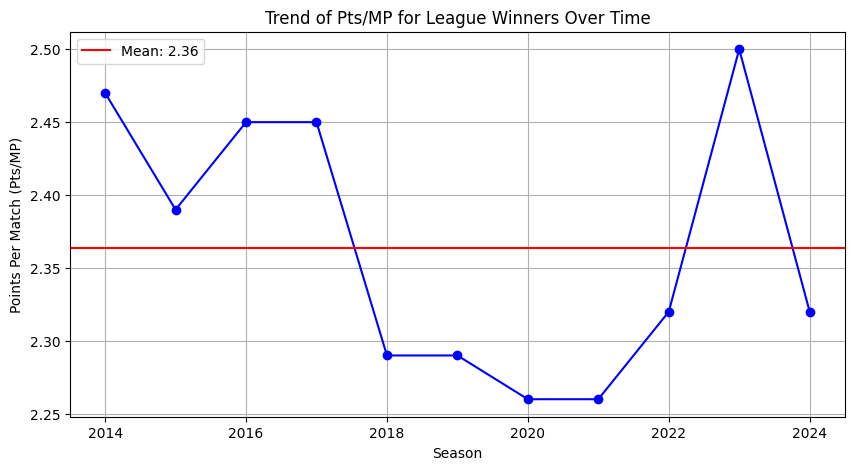

In [21]:
# Plot trend of 'pts/mp' for champions over the years
plt.figure(figsize=(10, 5))
plt.plot(champions_only["season"], champions_only["pts/mp"], marker="o", linestyle="-", color="b")
plt.axhline(y=mean_pts_mp, color='r', linestyle='-', label=f'Mean: {mean_pts_mp:.2f}')
plt.xlabel("Season")
plt.ylabel("Points Per Match (Pts/MP)")
plt.title("Trend of Pts/MP for League Winners Over Time")
plt.grid(True)
plt.legend()
plt.show()

### 🎯 Efficiency: xGD vs Actual Points
We compare **Expected Goal Difference (xGD)** to actual points.  

**Use Case**:  
- Overperformers: efficient or lucky teams.  
- Underperformers: wasteful finishing or poor defense.  
- Used in scouting, tactical analysis, and predictive modeling.  


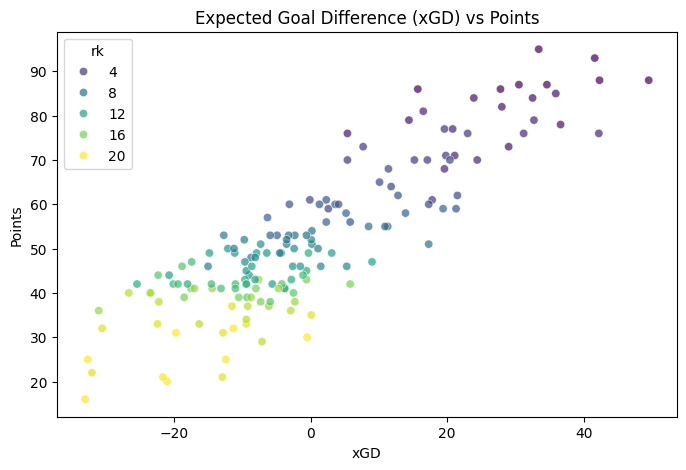

     season            squad   xgd  pts
0      2014        Barcelona   NaN   94
20     2015        Barcelona   NaN   91
40     2016      Real Madrid   NaN   93
60     2017        Barcelona  41.6   93
80     2018        Barcelona  30.5   87
100    2019      Real Madrid  34.6   87
120    2020  Atlético Madrid  15.7   86
140    2021      Real Madrid  27.8   86
160    2022        Barcelona  42.3   88
180    2023      Real Madrid  33.4   95
200    2024        Barcelona  49.5   88


In [22]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=full_data, x="xgd", y="pts", hue="rk", palette="viridis", alpha=0.7)
plt.title("Expected Goal Difference (xGD) vs Points")
plt.xlabel("xGD")
plt.ylabel("Points")
plt.show()

champions_xgd = champions_only[["season","squad","xgd","pts"]]
print(champions_xgd)


### 🚨 Relegation Insights
We compare stats of relegated vs surviving teams and analyze the points threshold for survival.  

**Use Case**:  
- Helps clubs know “danger zone” performance.  
- Benchmarks survival chances mid-season.  
- Fans/media get insight into “40 points safety rule.”  


Avg stats (Relegated):
pts              30.303030
gd              -30.909091
gf               35.878788
ga               66.787879
attendance    15319.966667
dtype: float64

Avg stats (Survivors):
pts              55.887701
gd                5.454545
gf               52.374332
ga               46.919786
attendance    28372.603448
dtype: float64


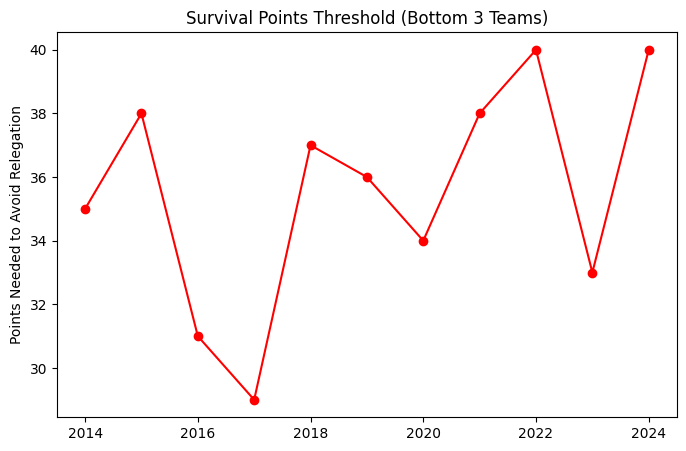

In [23]:
# Avg stats of relegated vs survivors
relegated = full_data[full_data["notes"].str.contains("Relegated", na=False)]
non_relegated = full_data[~full_data["notes"].str.contains("Relegated", na=False)]

print("Avg stats (Relegated):")
print(relegated[["pts","gd","gf","ga","attendance"]].mean())

print("\nAvg stats (Survivors):")
print(non_relegated[["pts","gd","gf","ga","attendance"]].mean())

# Points threshold for survival each season
survival_cutoff = full_data.groupby("season")["pts"].nsmallest(3).groupby("season").max()
plt.figure(figsize=(8,5))
plt.plot(survival_cutoff.index, survival_cutoff.values, marker="o", color="red")
plt.title("Survival Points Threshold (Bottom 3 Teams)")
plt.ylabel("Points Needed to Avoid Relegation")
plt.show()



### ML Modeling & Predictions

In [24]:

from sklearn.ensemble import RandomForestClassifier  # Machine learning model
from sklearn.preprocessing import StandardScaler     # To normalize our features
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, log_loss  # Model evaluation
from sklearn.model_selection import cross_val_score  # For cross-validation
import pandas as pd                                  # For data manipulation
import numpy as np                           # For numerical operations

In [25]:

# Calculate how many games each team has left to play (La Liga has 38 total games)
full_data["games_left"] = 38 - full_data["mp"]

# Estimate the final number of points if each team keeps their current pace
full_data["projected_pts"] = full_data["pts"] + full_data["games_left"] * full_data["pts/mp"]

# Create a binary column to indicate if a team was champion that season (1 = champion, 0 = not)
full_data["is_champion"] = (full_data["rk"] == 1).astype(int)

In [26]:

full_data.tail(3)

,rk,squad,mp,w,d,l,gf,ga,gd,pts,pts/mp,attendance,top_team_scorer,goalkeeper,notes,season,xg,xga,xgd,xgd/90,is_champion,games_left,projected_pts
217,18,Leganés,38,9,13,16,39,56,-17,40,1.05,11135.0,Dani Raba - 8,Marko Dmitrović,Relegated,2024,36.0,59.4,-23.4,-0.62,0,0,40.0
218,19,Las Palmas,38,8,8,22,40,61,-21,32,0.84,23010.0,Fábio Silva - 10,Jasper Cillessen,Relegated,2024,36.3,66.8,-30.5,-0.80,0,0,32.0
219,20,Valladolid,38,4,4,30,26,90,-64,16,0.42,19831.0,Mamadou Sylla - 5,Karl Jakob Hein,Relegated,2024,34.6,67.6,-33.0,-0.87,0,0,16.0


In [27]:
# Define the features (inputs) the model will use
features = ["pts/mp", "gd", "w", "l", "projected_pts"]

# Create training data: all seasons before 2025
df_train = full_data[full_data["season"] < 2025]

# Create testing data: only the 2024 season (current one)
df_test = full_data[full_data["season"] == 2024].copy()
df_test["season"] = 2025

# Define feature matrix (X) and target variable (y)
X_train = df_train[features]
y_train = df_train["is_champion"]
X_test = df_test[features]

In [28]:
# Initialize the model with 200 trees and a fixed random state for reproducibility
model = RandomForestClassifier(n_estimators=200, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [29]:
# Predict binary outcomes (0 or 1) on training set
train_preds = model.predict(X_train)

# Predict probabilities of being champion
train_probs = model.predict_proba(X_train)[:, 1]  # Only the prob of class 1

In [30]:
# Compute accuracy
accuracy = accuracy_score(y_train, train_preds)

# Compute ROC AUC score
roc_auc = roc_auc_score(y_train, train_probs)

# Compute log loss (lower is better)
logloss = log_loss(y_train, train_probs)

# Print performance metrics
print(f"\nModel Performance on Historical Data")
print(f"Accuracy: {accuracy:.3f}")
print(f"ROC AUC Score: {roc_auc:.3f}")
print(f"Log Loss: {logloss:.3f}")

# Print detailed classification performance
print("\nClassification Report:")
print(classification_report(y_train, train_preds))

# Show confusion matrix (true vs predicted values)
print("Confusion Matrix:")
print(confusion_matrix(y_train, train_preds))


Model Performance on Historical Data
Accuracy: 1.000
ROC AUC Score: 1.000
Log Loss: 0.013

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       209
           1       1.00      1.00      1.00        11

    accuracy                           1.00       220
   macro avg       1.00      1.00      1.00       220
weighted avg       1.00      1.00      1.00       220

Confusion Matrix:
[[209   0]
 [  0  11]]


In [31]:
# Predict probability of becoming champion
df_test["win_probability"] = model.predict_proba(X_test)[:, 1]

In [32]:
df_test.head()

,rk,squad,mp,w,d,l,gf,ga,gd,pts,pts/mp,attendance,top_team_scorer,goalkeeper,notes,season,xg,xga,xgd,xgd/90,is_champion,games_left,projected_pts,win_probability
200,1,Barcelona,38,28,4,6,102,39,63,88,2.32,45953.0,Robert Lewandowski - 27,Iñaki Peña,→ Champions League via league finish,2025,91.5,41.9,49.5,1.30,1,0,88.0,0.885
201,2,Real Madrid,38,26,6,6,78,38,40,84,2.21,69807.0,Kylian Mbappé - 31,Thibaut Courtois,→ Champions League via league finish,2025,75.3,42.8,32.5,0.86,0,0,84.0,0.035
202,3,Atlético Madrid,38,22,10,6,68,30,38,76,2.00,60883.0,Alexander Sørloth - 20,Jan Oblak,→ Champions League via league finish,2025,64.6,33.4,31.2,0.82,0,0,76.0,0.000
203,4,Athletic Club,38,19,13,6,54,29,25,70,1.84,48420.0,Oihan Sancet - 15,Unai Simón,→ Champions League via league finish,2025,53.0,37.8,15.2,0.40,0,0,70.0,0.000
204,5,Villarreal,38,20,10,8,71,51,20,70,1.84,18266.0,Ayoze Pérez - 19,Diego Conde,→ Champions League via league finish,2025,64.8,44.4,20.4,0.54,0,0,70.0,0.000


In [33]:
# Normalize the probabilities so that all teams add up to 100%
df_test["win_probability (%)"] = df_test["win_probability"] / df_test["win_probability"].sum() * 100

# Round the values for better readability
df_test["win_probability (%)"] = df_test["win_probability (%)"].round(3)

In [34]:
# Sort the test DataFrame by win probability descending
df_test = df_test.sort_values("projected_pts", ascending=False)
print("\nChampionship Win Probabilities (2024):")
df_test[["squad", "pts", "projected_pts", "pts/mp", "gd", "games_left", "win_probability (%)"]]


Championship Win Probabilities (2024):


,squad,pts,projected_pts,pts/mp,gd,games_left,win_probability (%)
200,Barcelona,88,88.0,2.32,63,0,96.196
201,Real Madrid,84,84.0,2.21,40,0,3.804
202,Atlético Madrid,76,76.0,2.00,38,0,0.000
203,Athletic Club,70,70.0,1.84,25,0,0.000
204,Villarreal,70,70.0,1.84,20,0,0.000
205,Betis,60,60.0,1.58,7,0,0.000
206,Celta Vigo,55,55.0,1.45,2,0,0.000
207,Rayo Vallecano,52,52.0,1.37,-4,0,0.000
208,Osasuna,52,52.0,1.37,-4,0,0.000
209,Mallorca,48,48.0,1.26,-9,0,0.000


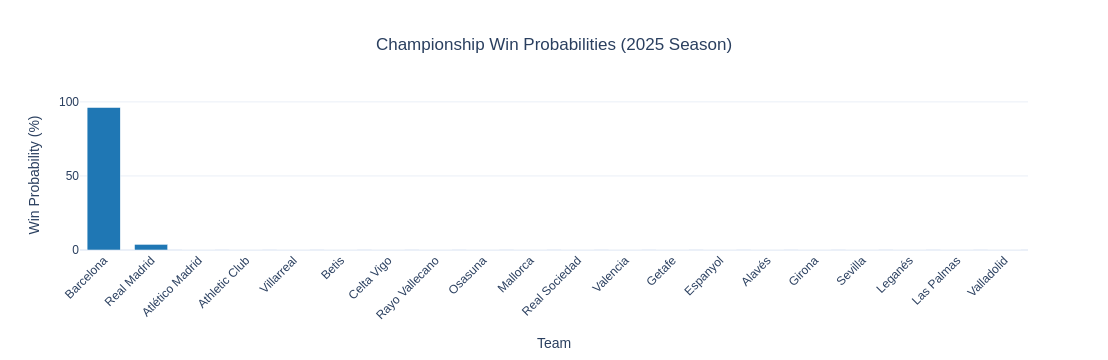

In [35]:
import plotly.express as px

# Sort by projected_pts (descending)
df_test_sorted = df_test.sort_values("projected_pts", ascending=False)

# Plot bar chart
fig = px.bar(
    df_test_sorted,
    x="squad",
    y="win_probability (%)",
    color_discrete_sequence=["#1f77b4"],
    title="Championship Win Probabilities (2025 Season)",
    labels={"squad": "Team", "win_probability (%)": "Win Probability (%)"},
    template="plotly_white"
)

# Improve layout
fig.update_layout(
    xaxis_title="Team",
    yaxis_title="Win Probability (%)",
    xaxis_tickangle=-45,
    bargap=0.3,
    title_x=0.5
)

fig.show()

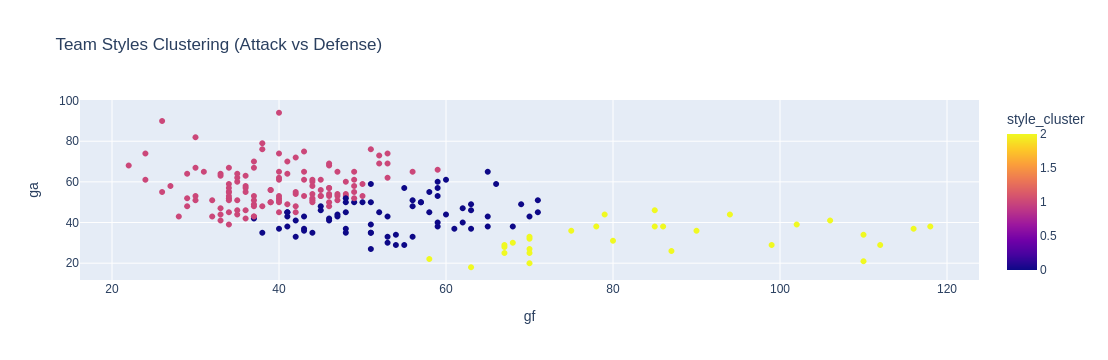

In [36]:
from sklearn.cluster import KMeans
features_cluster = full_data[["gf","ga","gd","pts"]]
kmeans = KMeans(n_clusters=3, random_state=42)
full_data["style_cluster"] = kmeans.fit_predict(features_cluster)

px.scatter(full_data, x="gf", y="ga", color="style_cluster",
           hover_name="squad", title="Team Styles Clustering (Attack vs Defense)")


- Based on our analysis Barcelona has 86.16% chances of being the champion of Spain followed by Real Madrid 13.8 
- The 7th position for the conference league is most like gonna be Celta Vigo (based on Projected points)
- The relegated teams will most likely be 'Valladolid' and 'Las Palmas'